In [2]:
import datetime as dt
import pandas as pd
import numpy as np
from scipy.stats import norm
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

(Symbols
 ^NSEBANK    0.084393
 Name: 2022-11-23 00:00:00, dtype: float64,
 Symbols
 ^NSEBANK    42729.101562
 Name: 2022-11-23 00:00:00, dtype: float64)

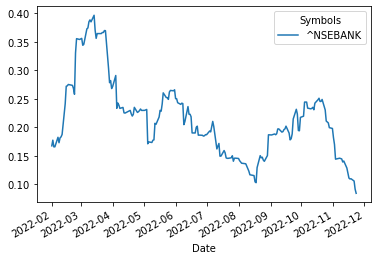

In [3]:
end = dt.datetime.now()
start = dt.datetime(2022,1,1)
df = pdr.get_data_yahoo(['^NSEBANK'], start, end)
Close = df.Close
Close.tail()
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
TRADING_DAYS = 20
volatility = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(252)
volatility.plot()
volatility.iloc[-1], Close.iloc[-1]

In [4]:
#VARIABLES OF BSM
r = 0.054
S = 42475
K = 42500
T = 36/365
sigma = 0.0916
def blackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price, bs(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")

In [5]:
print("Option Price: ", blackScholes(r, S, K, T, sigma, "c"))

Option Price:  (593.253119307421, 593.2531193074186)


In [6]:
def delta_calc(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc, delta(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")

In [7]:
def vega_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        vega_calc = S*norm.pdf(d1, 0, 1)*np.sqrt(T)
        return vega_calc*0.01, vega(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")

In [8]:
def gamma_calc(r, S, K, T, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        gamma_calc = norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
        return gamma_calc, gamma(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")

In [9]:
def rho_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            rho_calc = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return rho_calc*0.01, rho(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")

In [10]:
def theta_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta_calc/365, theta(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")

In [11]:
option_type='p'
print("Option Price: ", [round(x,3) for x in blackScholes(r, S, K, T, sigma, option_type)])
print(" Delta: ", [round(x,3) for x in delta_calc(r, S, K, T, sigma, option_type)])
print(" Gamma: ", [round(x,3) for x in gamma_calc(r, S, K, T, sigma, option_type)])
print(" Vega : ", [round(x,3) for x in vega_calc(r, S, K, T, sigma, option_type)])
print(" Theta: ", [round(x,3) for x in theta_calc(r, S, K, T, sigma, option_type)])
print(" Rho : ", [round(x,3) for x in rho_calc(r, S, K, T, sigma, option_type)])

Option Price:  [392.499, 392.499]
 Delta:  [-0.429, -0.429]
 Gamma:  [0.0, 0.0]
 Vega :  [52.37, 52.37]
 Theta:  [-3.909, -3.909]
 Rho :  [-18.357, -18.357]
